In [23]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
namelist = ['name','timestamp','count']
oo = pd.read_csv('~/projects/uatu/uatu.csv', index_col=False,names=namelist)

In [4]:
df2 = oo.fillna(0)

In [5]:
names = oo['name'].unique()

In [6]:
names

array(['camera_1', 'camera_2', 'camera_3', 'camera_4', 'camera_5',
       'camera_6', 'camera_7', 'camera_8', 'camera_9', 'camera_10',
       'camera_11', 'camera_12', 'camera_13', 'camera_14', 'camera_15',
       'camera_16', 'camera_17', 'camera_18', 'camera_19', 'camera_20',
       'camera_21', 'camera_22', 'camera_23', 'camera_24'], dtype=object)

In [28]:
grouped = oo.groupby('name').max()
grouped

,timestamp,count
name,,
camera_1,1.579478e+09,NaN
camera_10,1.579478e+09,NaN
camera_11,1.579478e+09,2.0
camera_12,1.579478e+09,0.0
camera_13,1.579478e+09,4.0
camera_14,1.579478e+09,7.0
camera_15,1.579478e+09,7.0
camera_16,1.579478e+09,6.0
camera_17,1.579478e+09,5.0


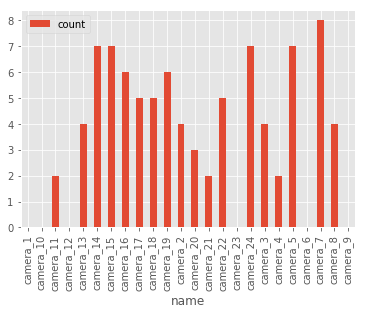

In [30]:
sorted_by_camera = grouped.sort_values('name', )
sorted_by_camera.plot(y='count', kind='bar')